# Analysis of MNIST data

In [6]:
# Load data from sklearn's datasets package
from sklearn import datasets
mnist = datasets.load_digits()

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [8]:
X,y = mnist['data'], mnist['target']

In [9]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

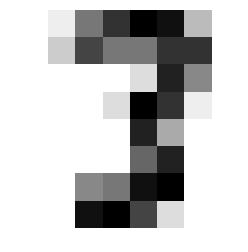

In [11]:
some_digit = X[23]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [24]:
train_data_size = int(len(X)*0.2) + 1
X_train, y_train = X[:train_data_size], y[:train_data_size]
X_test, y_test = X[train_data_size:], y[train_data_size:]

In [26]:
print(X_test.shape)
print(X_train.shape)


(1437, 64)
(360, 64)


### Training a Binary Classifier

* Let’s simplify the problem for now and only try to identify one digit—for
example, the number 5. This “5-detector” will be an example of a binary
classifier, capable of distinguishing between just two classes, 5 and not-5.


In [28]:
# Need to change the target values for binary classifier problem. 
# Now target value is boolean i.e. True if digit is 5 False otherwise
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [29]:
y_train_5[:5]

array([False, False, False, False, False])

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=47)
sgd_clf.fit(X_train, y_train_5)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=47, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [54]:
sgd_clf.predict([some_digit])

array([False])

## Perfomance Measure using Cross-Validation
* You could make predictions on
the test set, but let’s keep it untouched for now (remember that you want to use
the test set only at the very end of your project, once you have a classifier that
you are ready to launch). Instead, you can use the cross_val_score()
function to measure classifier performance using the "training data" only.

###### NOTE: 
** Just like the cross_val_score() function, cross_val_predict()
performs K-fold cross-validation, but instead of returning the evaluation scores, it
returns the predictions made on each test fold.

#### 1. Performace metric: "Accuracy"


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

array([0.96666667, 0.975     , 0.98333333])

* Above 96% accuracy on all three folds using Stochastic Gradient Descent Clissifier. This looks amazing does not it? Well, before conclude something let us try a very dumb classifier that just clissfies every single image as "not-5" class.

In [59]:
from sklearn.base import BaseEstimator
import numpy as np

class dumbclassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [60]:
dumb_clf = dumbclassifier()
cross_val_score(dumb_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9, 0.9, 0.9])

* That’s right, it has over 90% accuracy! This is simply because only about 10% of
the images are 5s, so if you always guess that an image is not a 5, you will be
right about 90% of the time.

### Conclusion1: 
* "Accuracy" generally is not the preferred performance measure of classifiers, especially when data is highly skewed(Data Imbalance Problem).



    
#### 2. Performace metric: "Confusion Matrix(Precision & Recall)"
* To compute the confusion matrix, you first need to have a set of predictions so
that they can be compared to the actual targets.

In [61]:
# Do not be confused with cross_val_score and cross_val_predict, both will perform k-fold cross validation,
# the only difference is in their return values. cross_val_score returns the evaluation scores for each fold but
# cross_val_predict returns the predictions made on each test fold.

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

In [62]:
# Now we are ready to get the confusion matrix since we have both predition and actual targets
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[320,   4],
       [  5,  31]])

* A perfect classifier would
have only true positives and true negatives, so its confusion matrix would have
nonzero values only on its main diagonal (top left to bottom right):

In [66]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8857142857142857
0.8611111111111112


In [67]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8732394366197184

#### NOTE:
* The F 1 score favors classifiers that have similar precision and recall. This is not
always what you want: in some contexts you mostly care about precision, and in
other contexts you really care about recall.

#### Precision/Recall Trade-off
* Instead of calling
the classifier’s predict() method, you can call its decision_function()
method, which returns a score for each instance, and then use any threshold you
want to make predictions based on those scores:

In [75]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)
threshold = -9000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[-8305.25793025]
[False]
[ True]


* How do you decide which threshold to use? First, use the
cross_val_predict() function to get the scores of all instances in the
training set, but this time specify that you want to return decision scores instead
of predictions
* With these scores, use the precision_recall_curve() function to compute
precision and recall for all possible thresholds

In [76]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

In [77]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

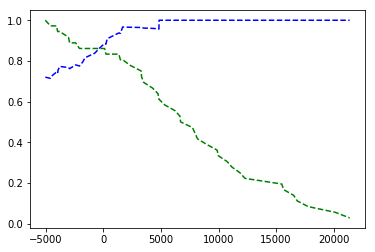

In [102]:
#plt.title("Precision and recall versus the decision threshold")
def plot_precesion_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    
    
plot_precesion_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [96]:
print(precisions.shape)
print(thresholds.shape)

(51,)
(50,)


In [103]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [104]:
y_train_pred_precision_90 = (y_scores >= threshold_90_precision)

In [105]:
print(precision_score(y_train_5, y_train_pred_precision_90))
print(recall_score(y_train_5, y_train_pred_precision_90))

0.9090909090909091
0.8333333333333334


#### The ROC Curve
* The receiver operating characteristic (ROC) curve is another common tool used
with binary classifiers. It is very similar to the precision/recall curve, but instead
of plotting precision versus recall, the ROC curve plots the true positive rate
(another name for recall) against the false positive rate. The FPR is the ratio of
negative instances that are incorrectly classified as positive. It is equal to 1 – the
true negative rate, which is the ratio of negative instances that are correctly
classified as negative. The TNR is also called specificity. Hence the ROC curve
plots sensitivity (recall) versus 1 – specificity.

In [114]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholdd = roc_curve(y_train_5, y_scores)

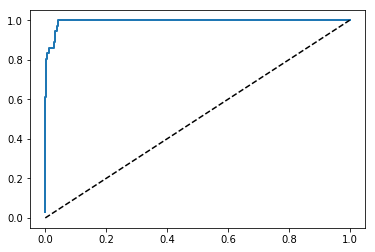

In [117]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()